## Quantization and visual quality
To create a digital image, we need to convert the continuous sensed data into digital form.This involves two processes: <b>sampling</b> and <b>quantization</b>.
<br>
To convert it to digital form, we have to <i>sample the function in both coordinates and in amplitude</i>. Digitizing the coordinate values is called sampling. Digitizing the amplitude values is called quantization.

In [1]:
import numpy as np
from scipy.misc import imread
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis

### Show a list of images as one image

In [2]:
def show_image_horizontaly(list_image, list_title, cmap=None):
    fig = figure(figsize=(20,20))
    n_image = len(list_image)
    for i in range(n_image):
        a=fig.add_subplot(1,n_image,i+1)
        plt.title(list_title[i])
        image = list_image[i]
        imshow(image,cmap=cmap)
        axis('off')

### Number of bits per pixel
As soon as pixel sum is 0, the process stops

In [14]:
def reduce_bits(initial_image, max_bit, noise=0):
    list_image = []
    list_title = []
    image = initial_image
    list_image.append(image)
    list_title.append(str(max_bit)  + "b of intensity resol.\n1st 4 pixels:\n" + str(image[0,:4]))
    for bit in reversed(range(max_bit)): # picked for rather than while to make the exit explicit with if statement
        image = np.round(image/2) + noise
        list_image.append(image)
        list_title.append(str(bit+1)  + "b of intensity resol.\n1st 4 pixels:\n" + str(image[0,:4]))
        if np.sum(image) == 0: # exit when matrix is zero
            break
    show_image_horizontaly(list_image, list_title=list_title, cmap="gray")

### Test bit reduction function on a small-sized image
8 bits of intensity resolution means image's intensity is quantized into 256 levels

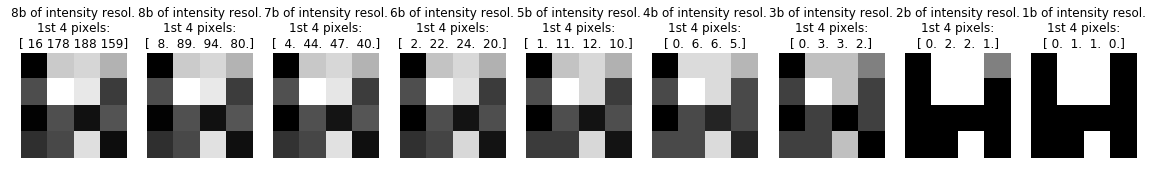

In [19]:
max_bit = 8
image = np.random.randint(2**max_bit, size=(4,4))
reduce_bits(initial_image = image, max_bit=max_bit)

### Bit reduction on mona image

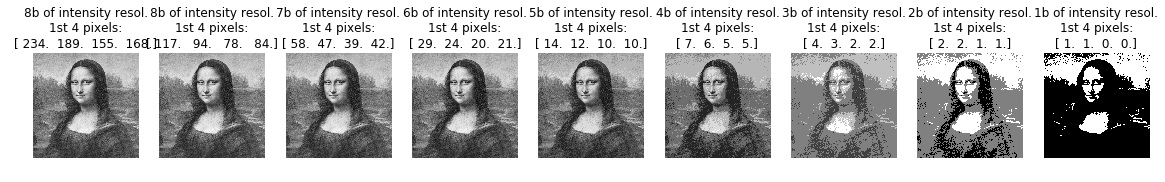

In [15]:
image_path = "data/mona.png"
image = imread(image_path, flatten=True)
reduce_bits(initial_image = image, max_bit=max_bit)

#### Dithering
Adding noise factor

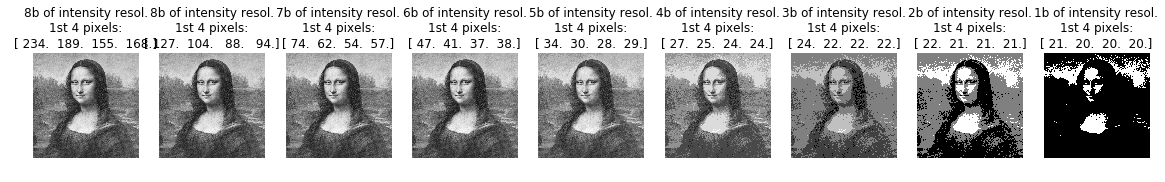

In [16]:
image_path = "data/mona.png"
image = imread(image_path, flatten=True)
reduce_bits(initial_image = image, max_bit=max_bit, noise=10)

### Bit reduction on lena image

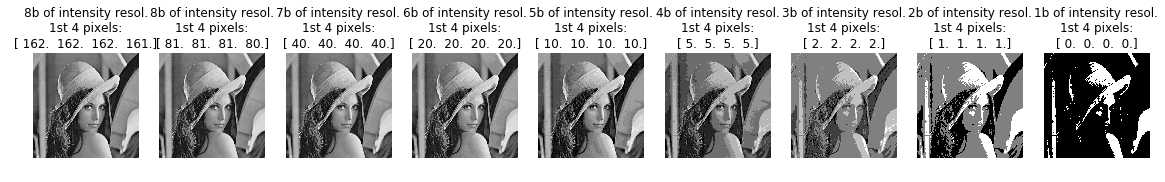

In [17]:
image_path = "data/lena.png"
image = imread(image_path, flatten=True)
reduce_bits(initial_image = image, max_bit=max_bit)

#### Dithering
Adding noise factor

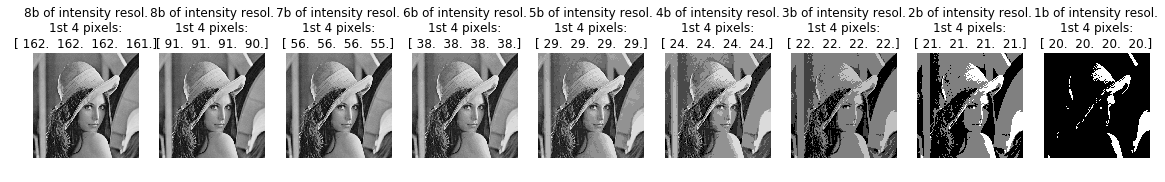

In [18]:
image_path = "data/lena.png"
image = imread(image_path, flatten=True)
reduce_bits(initial_image = image, max_bit=max_bit, noise=10)